<a href="https://colab.research.google.com/github/sc-dataman/DL_NNets/blob/master/march22_simulate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Recurrent Neural Network



# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import pandas as pd
import numpy as np
from google.colab import files
uploaded = files.upload()
#df = pd.read_csv('NSE-TATAGLOBAL(1).csv')



In [0]:

import io
df = pd.read_csv(io.BytesIO(uploaded['Google_Stock_Price_Train.csv']))
df.head(5)


,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [0]:
# Importing the training set
#dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')


dataset_train =  pd.read_csv(io.BytesIO(uploaded['Google_Stock_Price_Train.csv']))

dataset_train.head(10)


,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
5,1/10/2012,313.70,315.72,307.30,621.43,"8,824,000"
6,1/11/2012,310.59,313.52,309.40,624.25,"4,817,800"
7,1/12/2012,314.43,315.26,312.08,627.92,"3,764,400"
8,1/13/2012,311.96,312.30,309.37,623.28,"4,631,800"
9,1/17/2012,314.81,314.81,311.67,626.86,"3,832,800"


In [0]:
training_set = dataset_train.iloc[:, 1:2].values #.values is used for creating a numpy array

training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [0]:

# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1)) #default feature range
"""We have to take new variable and apply fit_transform method from minmax scaler class. Here fit means it is going to
get the min and max of the input data so that it could apply values to the Normalisation formulae. And from that transform method
it is going to compute scaled stock prices for each of the stock prices from the training set according to the Normalisation Formulae"""
training_set_scaled = sc.fit_transform(training_set) 

# Creating a data structure with 60 timesteps and 1 output
"""60 timesteps means that for each time t rnn is going to look at 60 stock prices before time t that is stock prices between 60 days before time t and time t
and based on the trends and correlation it is capturing during the 60 periods time steps it is going to predict the next output."""
X_train = [] # inputs to the NN
y_train = [] # output to the NN
for i in range(60, 1258): #to populate X_train and y_train
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
#Here we are getting 3d structure for X_train by adding third dimension as indicator.
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))




In [0]:

# Part 2 - Building the RNN using stacked LSTMs

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

"""Initialising the RNN as a sequence of layers as opposed to computational graphs
here regressor is used because we are predicting continous values."""
regressor = Sequential()

"""Adding the first LSTM layer and some Dropout regularisation
  regressor is an object to sequential class. Sequential class contains add method which is used here.
  Then we add lstm layer using lstm class. 
  It contains three arguments: 1. No of Units/neurons 2.To create stacked(more than 1 layer) LSTM we have to set return_sequences = True
  3. input_shape contains three dimensions no of observations, no of timesteps and no of indicators, here we have taken last two dimensions because first one will
  be automatically considered."""
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
#here we are using dropout regularization in order to prevent overfitting in the model.
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')#here loss is mse because we are doing regression here

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)
"""Since here our dataset is less that's why we have set our epochs = 100, We can also increase no of epochs but it might 
leads to overfitting which is bad for our model."""


Using TensorFlow backend.






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/100





1198/1198 [==============================] - 10s 8ms/step - loss: 0.0561
Epoch 2/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0061
Epoch 3/100
1198/1198 [==============================] - 7s 5ms/step - loss: 0.0055
Epoch 4/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0051
Epoch 5/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0051
Epoch 6/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0043
Epoch 7/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0046
Epoch 8/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0043
Epoch 9/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0043
Epoch 10/100
1198/119

"Since here our dataset is less that's why we have set our epochs = 100, We can also increase no of epochs but it might \nleads to overfitting which is bad for our model."

In [0]:
from google.colab import files
uploaded_test = files.upload()



Saving Google_Stock_Price_Test.csv to Google_Stock_Price_Test.csv


In [0]:

dataset_test =  pd.read_csv(io.BytesIO(uploaded_test['Google_Stock_Price_Test.csv']))

dataset_test.head(10)



,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"
5,1/10/2017,807.86,809.13,803.51,804.79,"1,176,800"
6,1/11/2017,805.00,808.15,801.37,807.91,"1,065,900"
7,1/12/2017,807.14,807.39,799.17,806.36,"1,353,100"
8,1/13/2017,807.48,811.22,806.69,807.88,"1,099,200"
9,1/17/2017,807.08,807.14,800.37,804.61,"1,362,100"


In [0]:

# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2017
#dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values #converting it into numpy array using .values at end

In [0]:

# Getting the predicted stock price of 2017
"""Here to predict the stock price of particular day we have to take input as a stockprices of previous 60 days.
And while predicting the output some of the stock prices in Jan 2017 have their inputs as the stock prices in test set.
Therefore we have to concatenate both the dataset and forms the total dataset. """
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
#here we have not used iloc method from pandas to get inputs so here there are chances that we can face format problem so we have to reshape the inputs using reshape function
inputs = inputs.reshape(-1,1)
#scaling the inputs
inputs = sc.transform(inputs)
#loading the X_test list with values for predicting the Jan 2017 stock prices
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
#adding third dimension in X_test 
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#using predict method for predicting values Using X_test as input values
predicted_stock_price = regressor.predict(X_test)
#inverse_transform method is used for obtaining unscaled/original values.
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


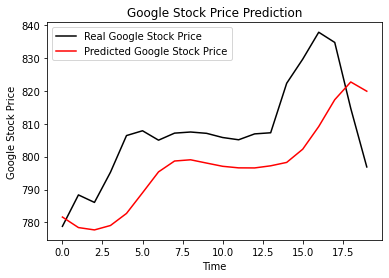

'\nConclusion: So here we can see that our model can closely predict the trends which are quite similar to the trends in the Google stock real prices.\n'

In [0]:

# Visualising the results
plt.plot(real_stock_price, color = 'black', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'red', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

"""
Conclusion: So here we can see that our model can closely predict the trends which are quite similar to the trends in the Google stock real prices.
"""